# Business Case : Aerofit Descriptive Statistics & Probability

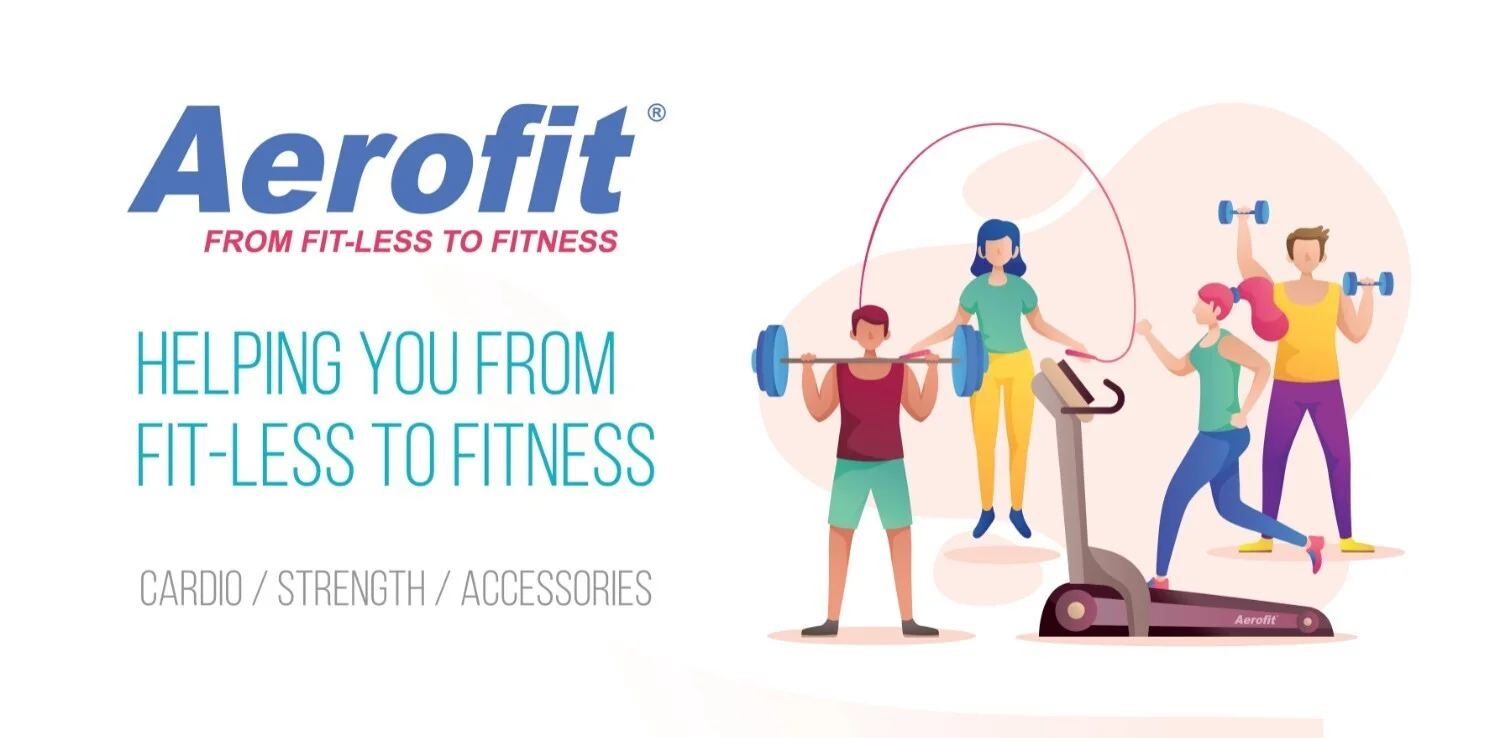

# Introduction :
 Aerofit is a fitness-equipment brand selling treadmills (KP281, KP481, KP781). This analysis aims to profile customers who purchased each treadmill model and compute marginal/conditional probabilities to guide targeted recommendations.

# Business Problem :
The market research team wants to identify target-audience characteristics for each treadmill model and understand how customer attributes (age, gender, income, fitness, usage, miles, education, marital status) differ across products. They also want contingency tables and conditional/marginal probabilities to support product recommendations.

# Concept Used :

| **Concept**                               | **Description / Purpose**                                                                                                                         |                                             |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------- |
| **Descriptive Statistics**                | Used to summarize data using measures like mean, median, mode, standard deviation, and IQR to understand the distribution of numerical variables. |                                             |
| **Data Visualization**                    | Helps interpret data patterns using plots such as histograms, boxplots, countplots, heatmaps, and pairplots.                                                                                              |                                             |
| **Missing Value Handling**                | Deals with incomplete data through imputation (mean/median/mode) or by removing affected records.                                                 |                                             |
| **Categorical Analysis**                  | Analyzes relationships between categorical variables using contingency tables and probability calculations.                                       |                                             |
| **Probability & Conditional Probability** | Computes marginal and conditional probabilities (e.g., P(Product/ Gender)) to understand customer tendencies. |
| **Correlation Analysis**                  | Measures strength and direction of relationships between continuous variables using Pearson correlation.                                          |                                                      |                                             |
| **Customer Profiling**                    | Groups customers based on demographic and behavioral attributes to identify target segments.                                                |                                             |


#Setting up the Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Link :

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749-aerofit_treadmill.csv

--2025-12-02 03:05:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749-aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.226.80, 18.65.226.6, 18.65.226.224, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.226.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749-aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-12-02 03:05:10 (93.3 MB/s) - ‘aerofit_treadmill.csv?1639992749-aerofit_treadmill.csv’ saved [7279/7279]



In [3]:
df=pd.read_csv('/content/aerofit_treadmill.csv?1639992749-aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#Data Overview :

| **Variable**  | **Type**      | **Description**                             | **Example / Range** |
| ------------- | ------------- | ------------------------------------------- | ------------------- |
| Product       | Categorical   | Model of treadmill purchased (3 categories) | KP281, KP481, KP781 |
| Age           | Numeric       | Customer age in years                       | 18 – 70             |
| Gender        | Categorical   | Gender of customer                          | Male / Female       |
| Education     | Numeric       | Years of education                          | 10 – 21             |
| MaritalStatus | Categorical   | Marital status of customer                  | Single / Partnered  |
| Usage         | Numeric       | Times the treadmill is used per week        | 1 – 7               |
| Income        | Numeric       | Annual income (in $)                        | 30,000 – 120,000    |
| Fitness       | Ordinal (1–5) | Self-rated fitness level                    | 1 (Low) – 5 (High)  |
| Miles         | Numeric       | Average miles run per week                  | 20 – 360            |


#Data Profiling :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.shape

(180, 9)

In [7]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


## Stastitical Description for Categorical and Numerical variables

In [8]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0




*   There was no NAN values in datset
*   The datset is clean and  ready for analysis



#Uni-Variate Analysis :

####What are the most popular distribution of customers by product type?

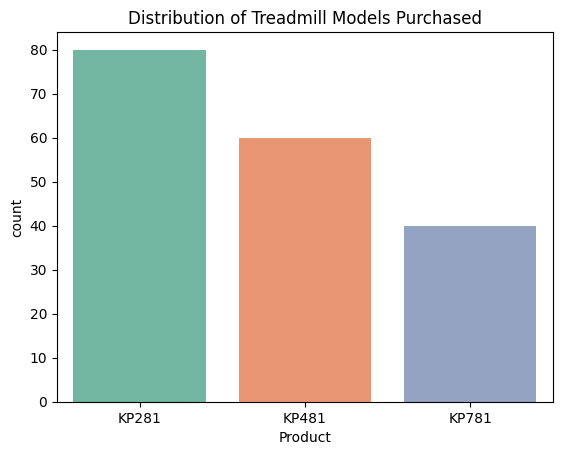

In [10]:
sns.countplot(data=df, x='Product', hue=df['Product'],palette='Set2')
plt.title('Distribution of Treadmill Models Purchased')
plt.show()

####What is the age distribution of customers?

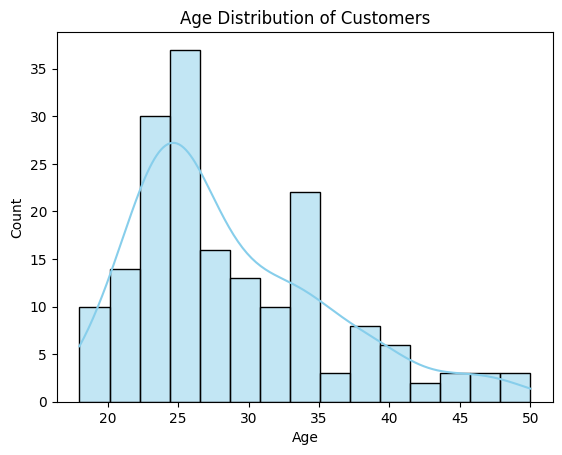

In [11]:
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

####What is the overall fitness level distribution (1–5 scale)?

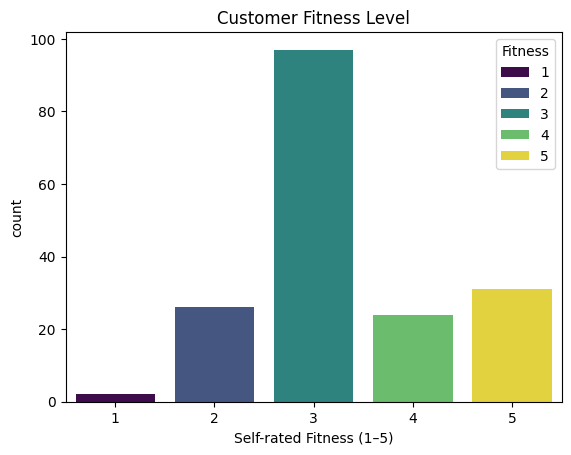

In [12]:
sns.countplot(data=df, x='Fitness',hue=df['Fitness'],palette='viridis')
plt.title('Customer Fitness Level')
plt.xlabel('Self-rated Fitness (1–5)')
plt.show()

#Bi-Variate Analysis :

####Does income differ by treadmill product type?

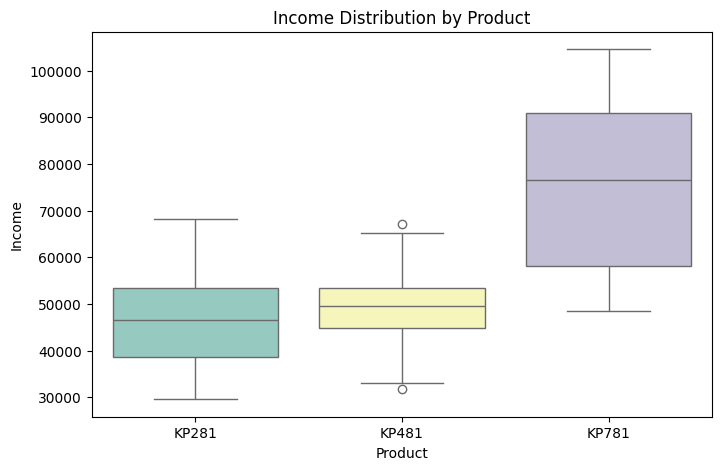

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Product', y='Income',hue=df['Product'],palette='Set3')
plt.title('Income Distribution by Product')
plt.show()

#### What is the gender-based product type and MaritalStatus-based product type?

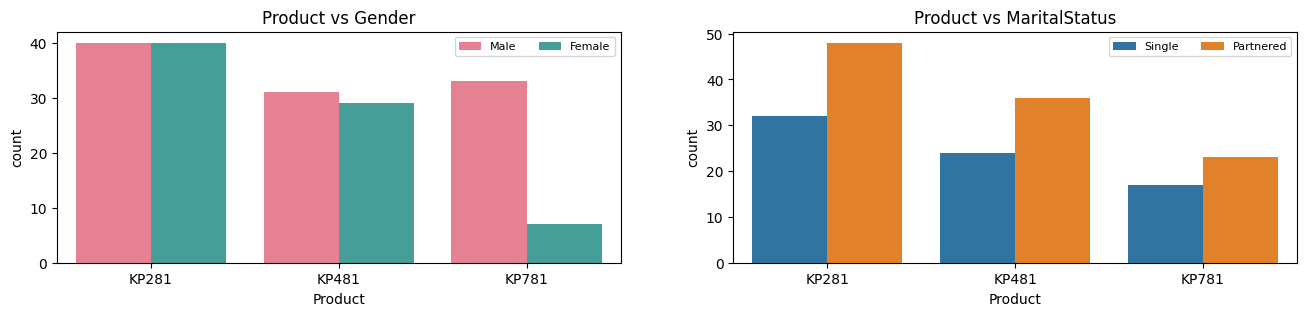

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,3))
sns.countplot(x=df['Product'],hue=df['Gender'],ax=axes[0],palette='husl')
axes[0].set_title('Product vs Gender')
axes[0].legend(prop={'size': 8},ncol=2)
sns.countplot(x=df['Product'],hue=df['MaritalStatus'],ax=axes[1])
axes[1].set_title('Product vs MaritalStatus')
axes[1].legend(prop={'size': 8},ncol=2)

####Distribution of Product over Discrete variables

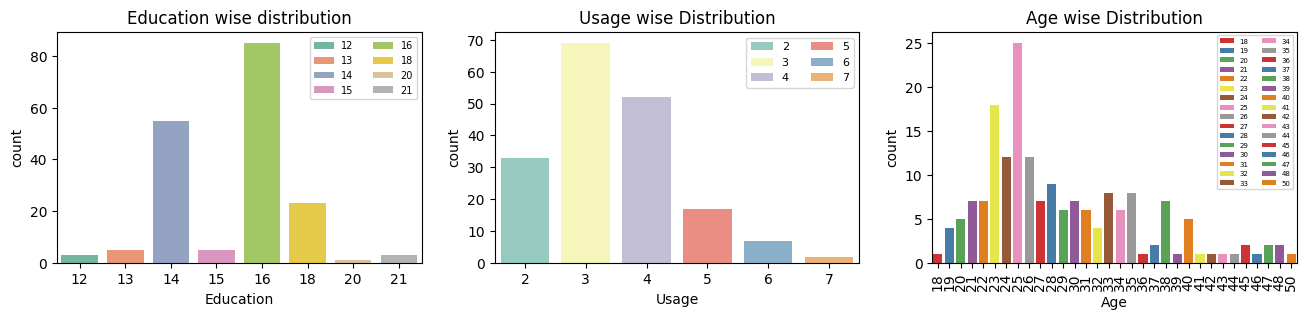

In [15]:
figure,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,3))
sns.countplot(x=df['Education'],ax=axes[0],hue=df['Education'],palette='Set2')
axes[0].set_title('Education wise distribution')
axes[0].legend(prop={'size': 7},ncol=2)

sns.countplot(x=df['Usage'],ax=axes[1],hue=df['Usage'],palette='Set3')
axes[1].set_title('Usage wise Distribution')
axes[1].legend(prop={'size': 8},ncol=2)

sns.countplot(x=df['Age'],ax=axes[2],hue=df['Age'],palette='Set1')
axes[2].set_title('Age wise Distribution')
axes[2].legend(prop={'size': 5},ncol=2)
plt.xticks(rotation=90)
plt.show()

####What is the Age-based product?

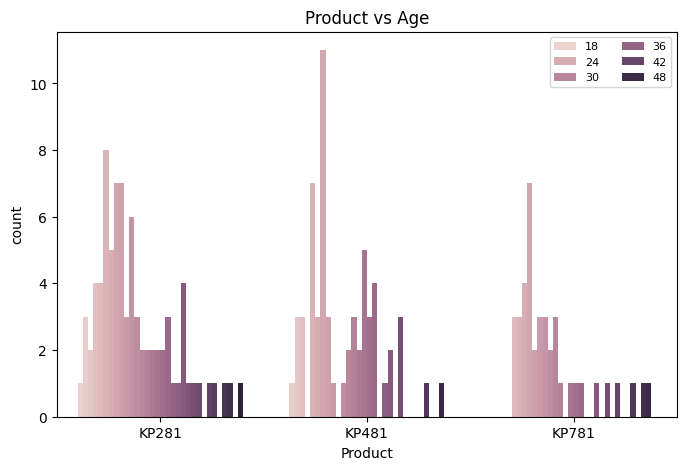

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Product'],hue=df['Age'])
plt.title('Product vs Age')
plt.legend(prop={'size': 8},ncol=2)
plt.show()

#Multi-Variate Analysis :

####Pairplot to visualize multiple variable relationships?

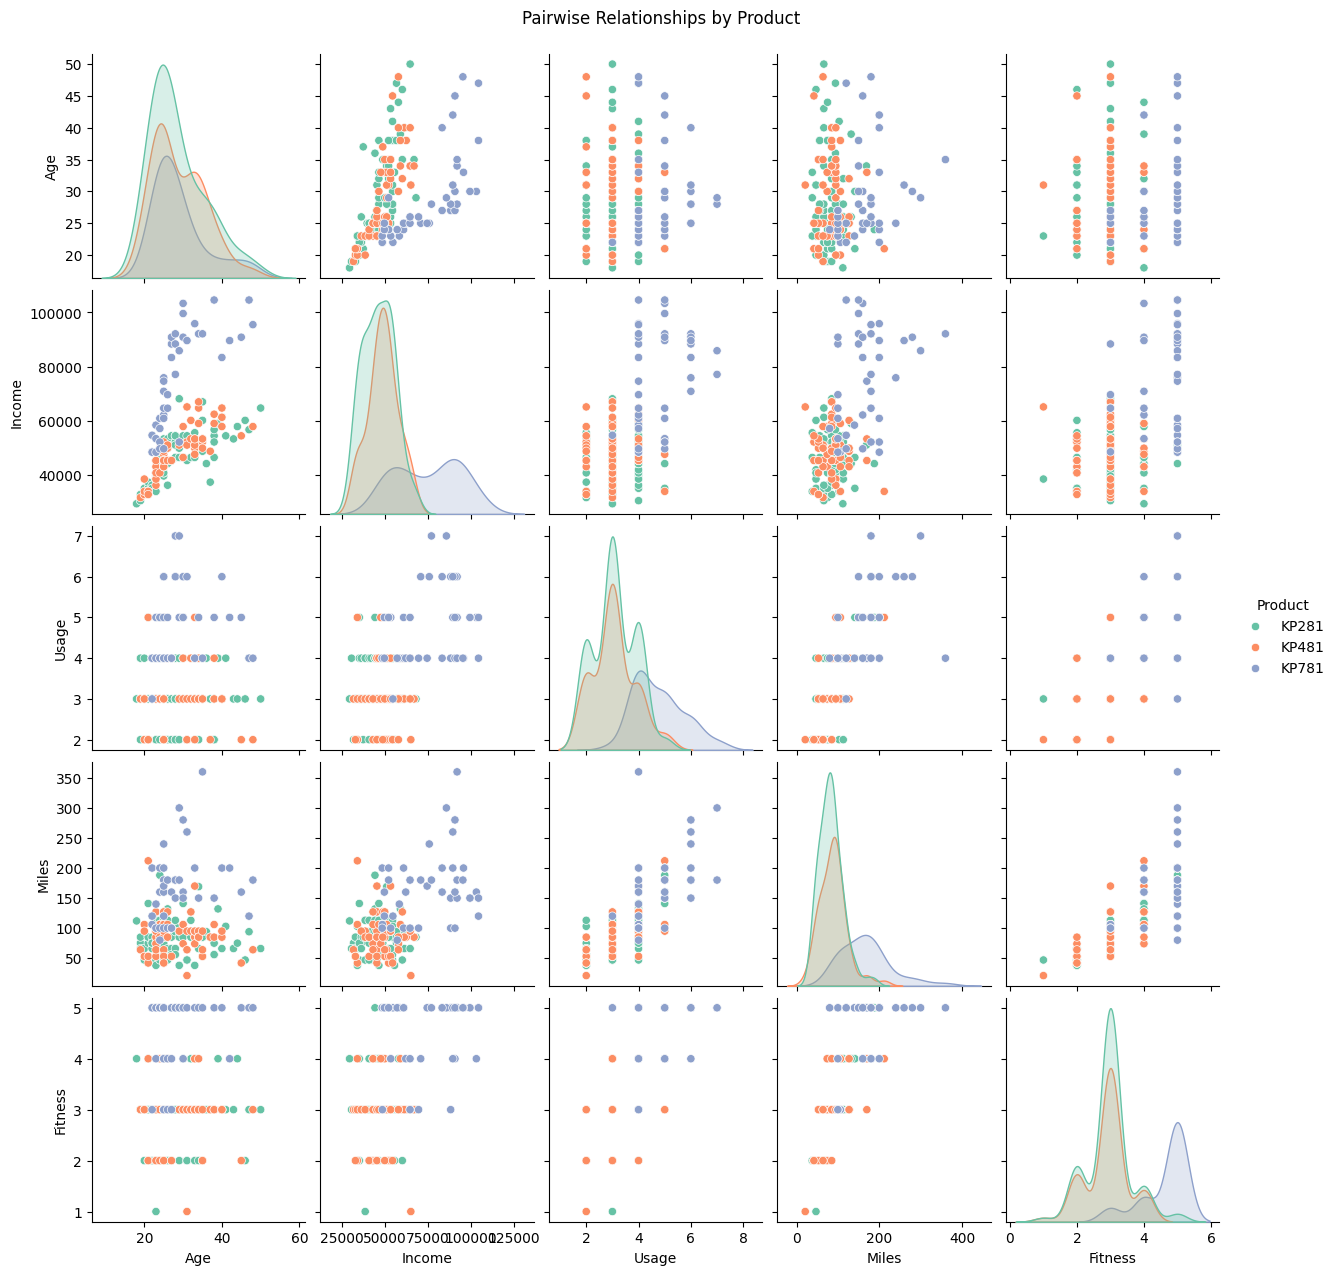

In [17]:
sns.pairplot(df, vars=['Age','Income','Usage','Miles','Fitness'], hue='Product', palette='Set2')
plt.suptitle('Pairwise Relationships by Product', y=1.02)
plt.show()

####Based on Standard Deviation. How does Income vary by AgeGroup and Product?

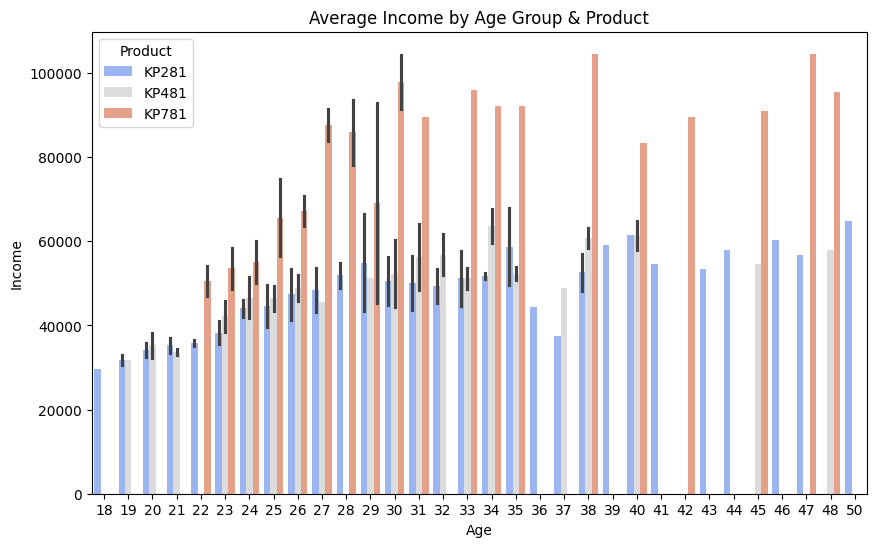

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age', y='Income', hue='Product', palette='coolwarm',errorbar="sd")
plt.title('Average Income by Age Group & Product')
plt.show()

####What are the relationship among numeric variables like Age, Income, Usage, Miles, and Fitness?

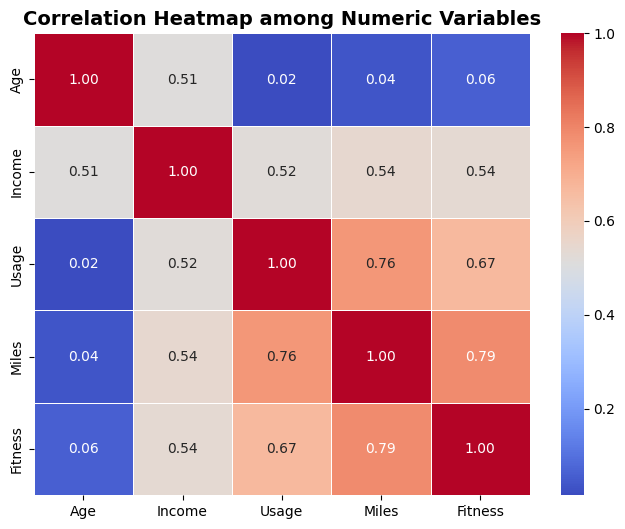

In [19]:
plt.figure(figsize=(8,6))
corr = df[['Age','Income','Usage','Miles','Fitness']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap among Numeric Variables', fontsize=14, fontweight='bold')
plt.show()

##Marginal Probability of a products :

In [20]:
Marginal_Probability=pd.crosstab(index=df['Product'],columns='Marginal probability')
np.round((Marginal_Probability),2)

col_0,Marginal probability
Product,
KP281,80
KP481,60
KP781,40


In [21]:
Probability_of_each_product=pd.crosstab(index=df['Product'],columns=' probability')/len(df)
print(np.round((Probability_of_each_product),2))

col_0    probability
Product             
KP281           0.44
KP481           0.33
KP781           0.22


###Conditional Probability of a products :

In [22]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [23]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [24]:
pd.crosstab(index=df['Product'],columns=df['Education'],margins=True,normalize=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.011111,0.016667,0.166667,0.022222,0.216667,0.011111,0.000000,0.000000,0.444444
KP481,0.005556,0.011111,0.127778,0.005556,0.172222,0.011111,0.000000,0.000000,0.333333
KP781,0.000000,0.000000,0.011111,0.000000,0.083333,0.105556,0.005556,0.016667,0.222222
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667,1.000000


In [25]:
pd.crosstab(index=df['Product'],columns=df['Usage'],margins=True,normalize=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


In [26]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#Customer Profiling :

                     🔹 1. KP281 – Entry-Level Customers


Age: Primarily below 35 years

Income: Low to moderate (below 60,000)

Fitness Level: 1–3 (Beginners)

Usage: 1–3 times per week

Miles: Low (under 5 miles/week)

Customer Type: Casual/occasional users

Gender Trend: Slightly more female buyers

    Insight:
These customers are new to fitness and prefer affordable, easy-to-use models. KP281 should be positioned as an entry-level treadmill for basic home workouts and first-time users.

                         🔹 2. KP481 – Mid-Level Customers


Age: Between 35–44 years

Income: Medium (60,000–90,000)

Fitness Level: 3–4 (Moderate)

Usage: 3–4 times per week

Miles: 5–12 miles/week

Customer Type: Regular exercisers

Gender Trend: Balanced between males and females

    Insight:
KP481 buyers are consistent fitness enthusiasts seeking a balance between price and performance. This product should be marketed as a value-for-money treadmill offering reliability and essential features for steady fitness progress.

                           🔹 3. KP781 – Premium Customers

Age: 40+ years

Income: High (90,000+)

Fitness Level: 4–5 (Advanced)

Usage: 5+ times per week

Miles: 12+ miles/week

Customer Type: Serious/committed runners

Gender Trend: Dominated by male buyers

    Insight:
These customers are serious athletes or high-income fitness enthusiasts who value advanced features, quality, and performance. KP781 should be promoted as a premium treadmill with emphasis on durability, technology, and long-term fitness benefits.

#Recomendations :

* KP281 (entry-level): Target younger & casual segments with affordable payment
plans and short-form video demos showing at-home convenience.

* KP481 (mid-level): Target regular runners with messaging focused on balance of performance and affordability — offer bundle accessories (heart-rate monitor).

* KP781 (premium): Focus on high-income serious runners: highlight advanced features, warranty, and performance metrics. Use email campaigns with technical specs and testimonials.

* Cross-sell / Upsell: For users with high Fitness but bought KP281, suggest upgrades or trade-in offers.

* Marketing channel targeting: If males are more likely to buy KP781, run male-targeted digital campaigns for KP781 but monitor conversion — also test female-oriented creative to expand reach.

* Inventory & pricing: Align stores with local demographic — branches in higher-income areas should carry more KP781 units.

#Conclusion :

The Aerofit Treadmill Descriptive Statistics and Probability Study provided valuable insights into customer behavior, demographic preferences, and product positioning across the three treadmill models — KP281, KP481, and KP781.

Through detailed data profiling, univariate, bivariate, and multivariate analyses, we deployed the able to identify key trends and relationships among variables such as Age, Income, Gender, Fitness, Usage, Miles, and Product Type.